<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231114.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

딥러닝

- ANN

- 경사하강법

- 오차역전파

- Optimizer

- CNN

- RNN, LSTM, GRU

- ResNet

#RNN

RNN = DNN + $h_t$

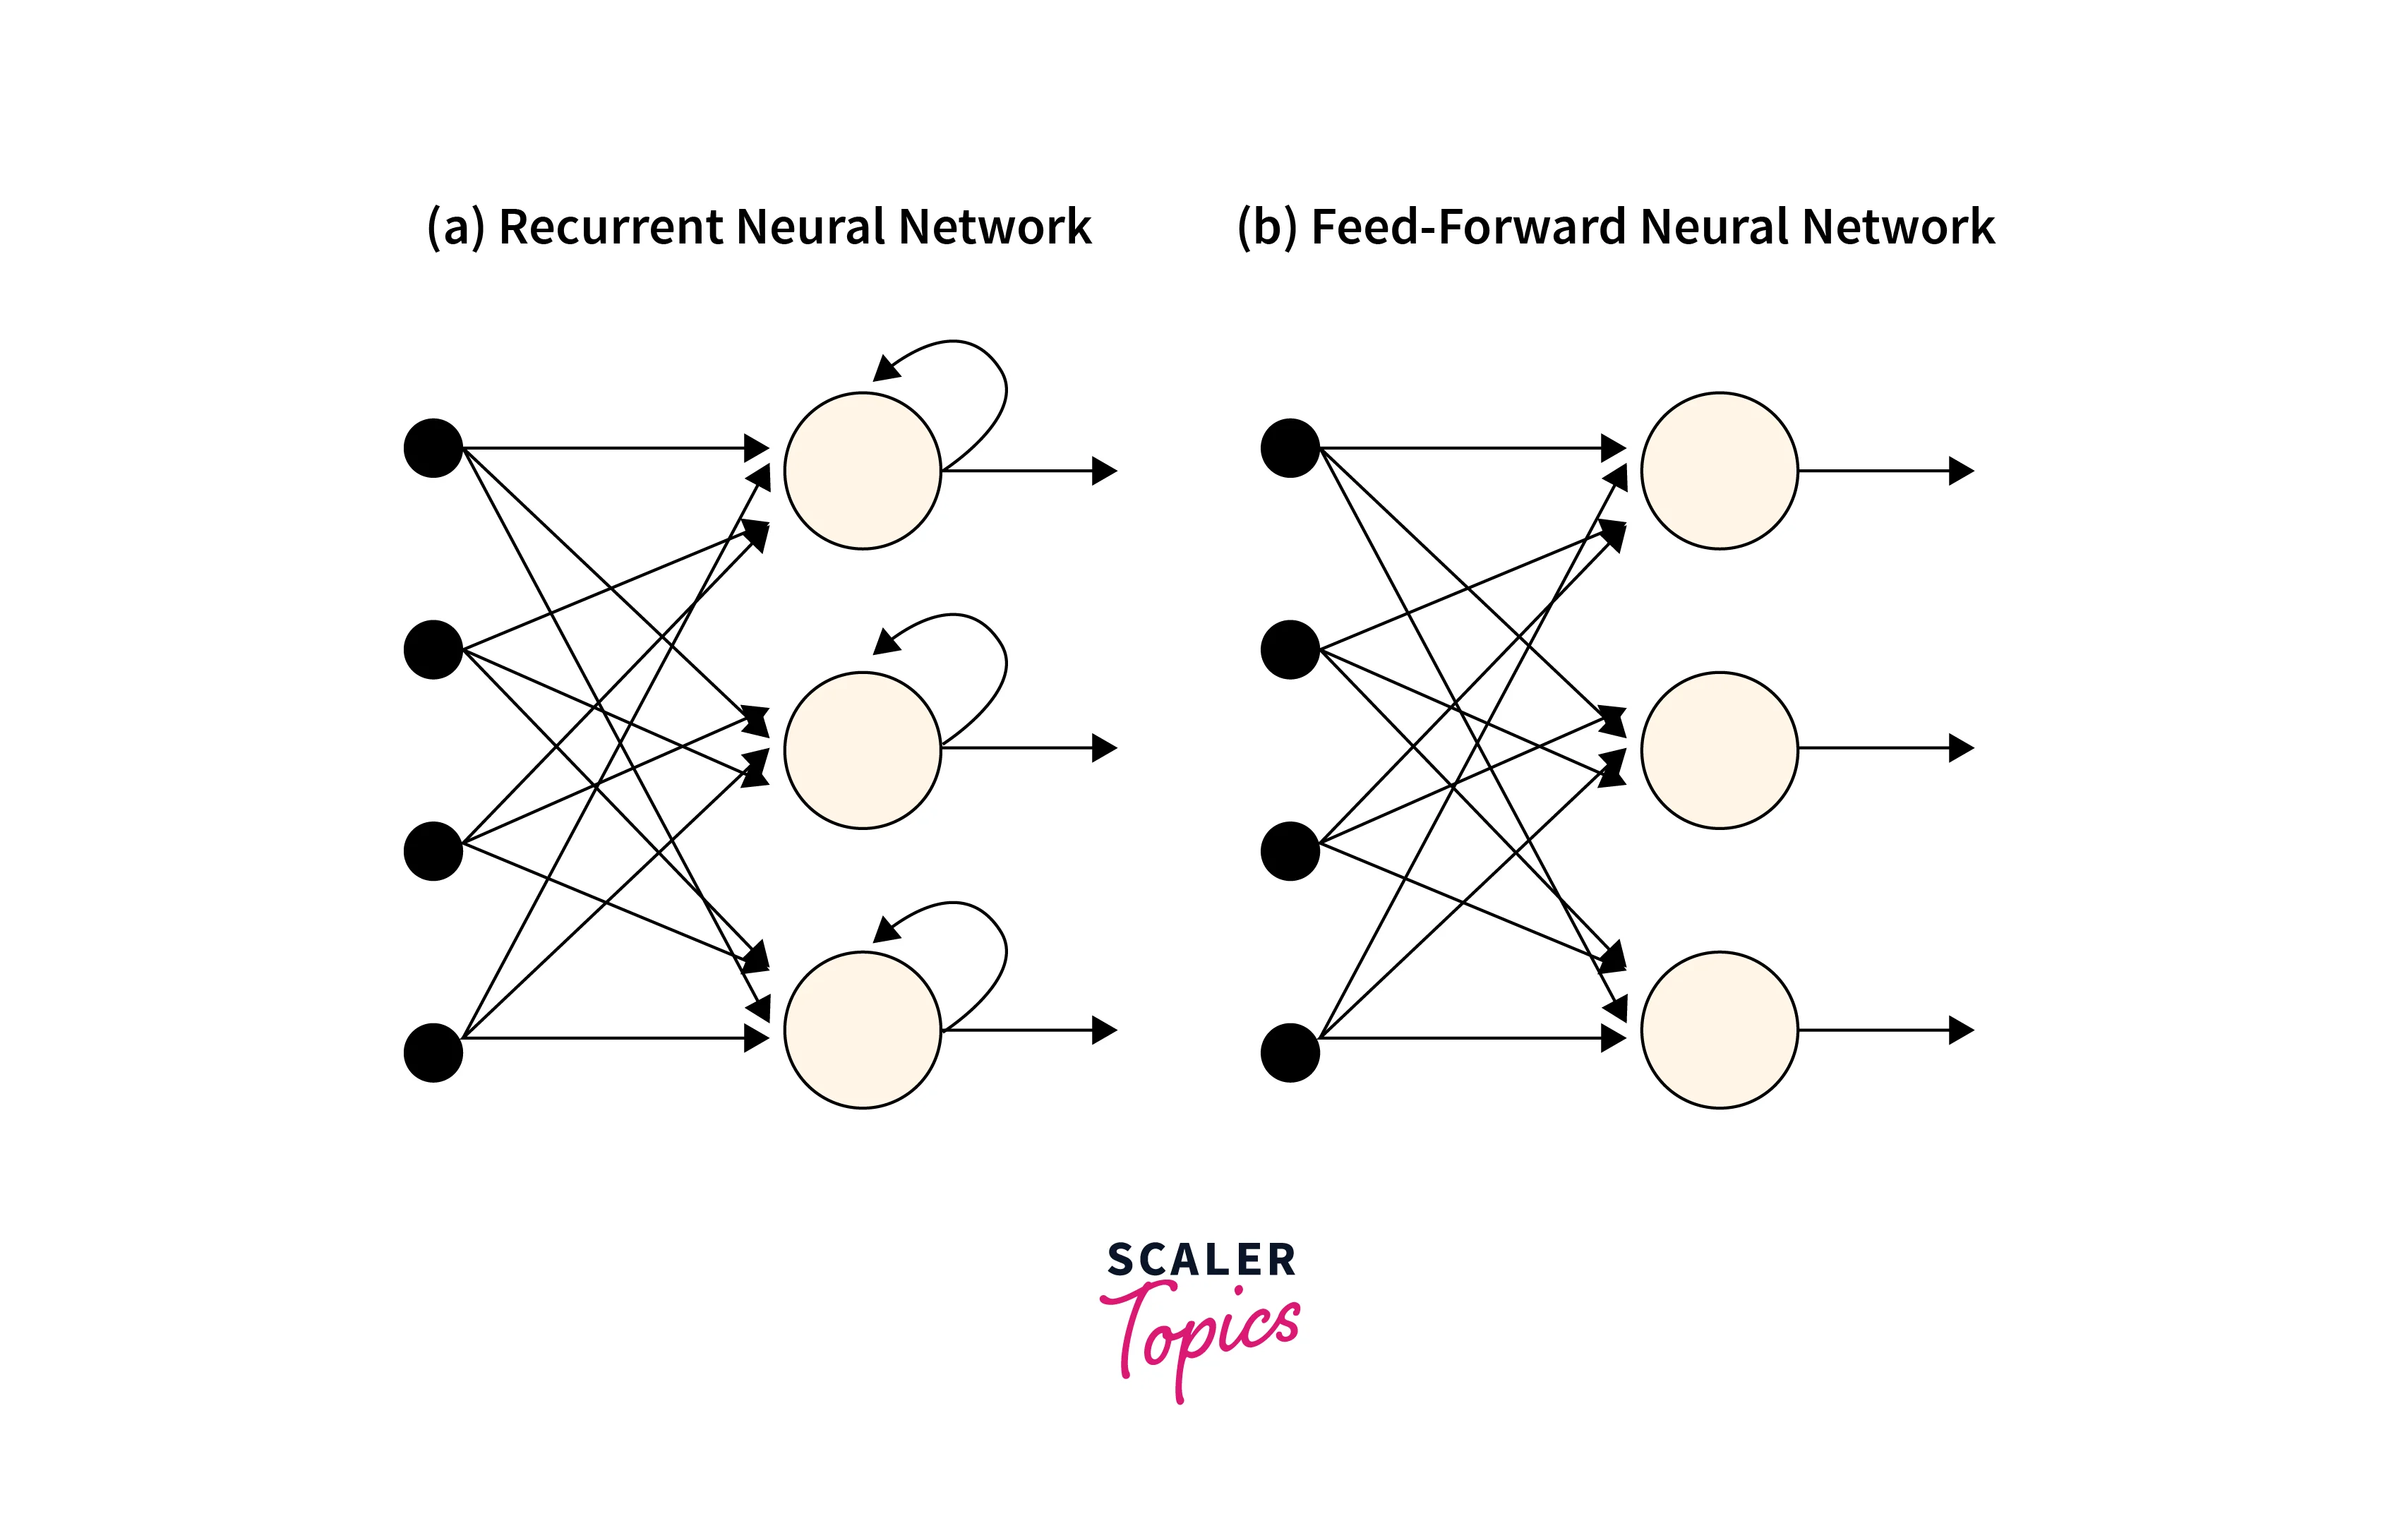

https://www.scaler.com/topics/deep-learning/rnn/

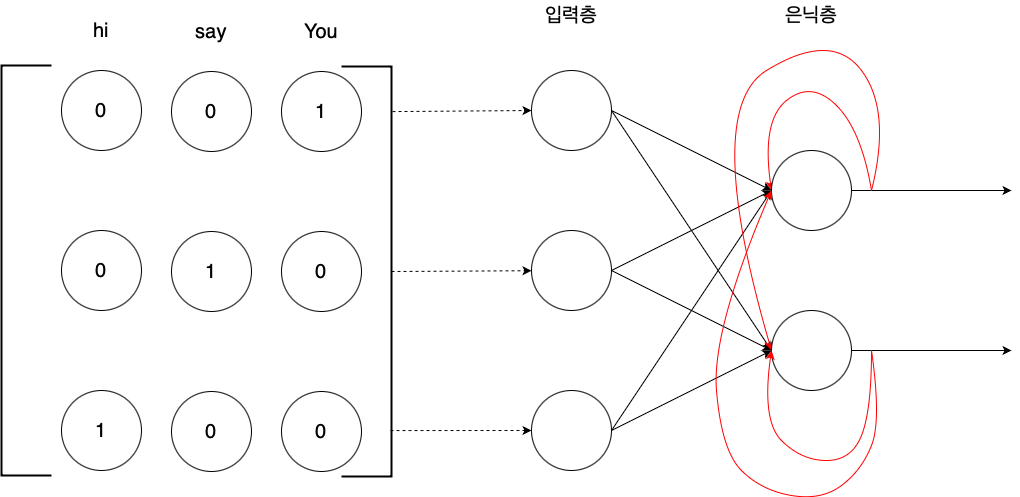

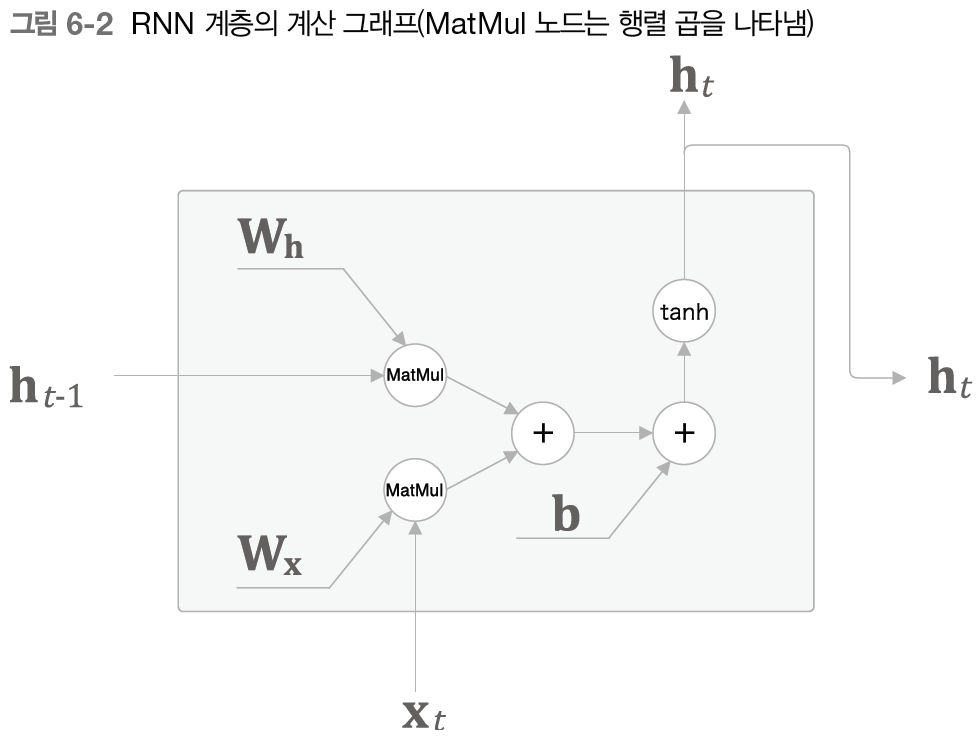

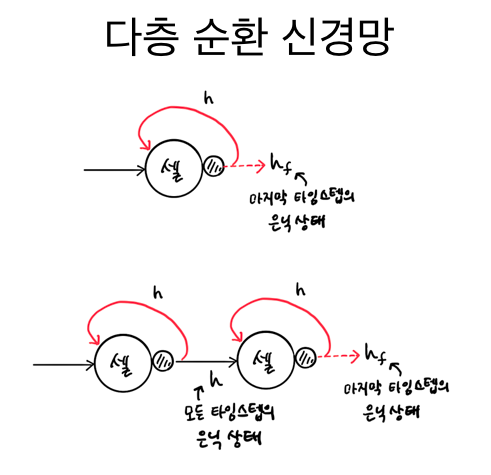

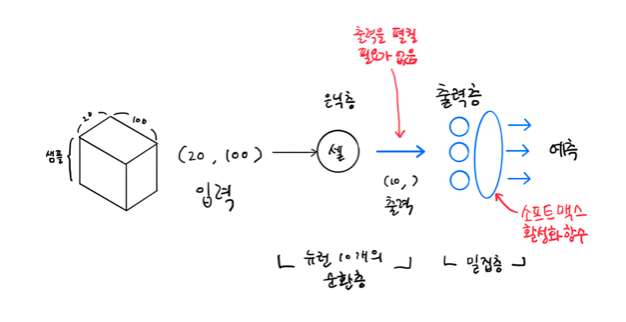

#예제 : IMDB 데이터셋

In [ ]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [ ]:
 from tensorflow.keras.datasets import imdb
 (train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
train_input.shape, test_input.shape

((25000,), (25000,))

In [ ]:
train_target.shape, test_target.shape

((25000,), (25000,))

부정 - 0, 긍정 - 1

In [ ]:
train_target[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
train_input[:3]

array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 

In [ ]:
len(train_input[0])

218

In [ ]:
len(train_input[1])

189

In [ ]:
for i in train_input[:10]:
  print(len(i))

218
189
141
550
147
43
123
562
233
130


In [ ]:
train_input[5]

[1,
 2,
 128,
 74,
 12,
 2,
 163,
 15,
 4,
 2,
 2,
 2,
 2,
 32,
 85,
 156,
 45,
 40,
 148,
 139,
 121,
 2,
 2,
 10,
 10,
 2,
 173,
 4,
 2,
 2,
 16,
 2,
 8,
 4,
 226,
 65,
 12,
 43,
 127,
 24,
 2,
 10,
 10]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
np.unique(train_target, return_counts=True)

(array([0, 1]), array([12500, 12500]))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, val_input, train_target, val_target = train_test_split(train_input,
                                                                    train_target, test_size=0.2,
                                                                    random_state=42)

In [ ]:
train_input.shape, val_input.shape, train_target.shape, val_target.shape

((20000,), (5000,), (20000,), (5000,))

In [ ]:
lengths = np.array([len(x) for x in train_input])

In [ ]:
lengths[:10]

array([259, 520, 290, 109, 559,  96, 130, 935, 383, 716])

In [ ]:
np.mean(lengths), np.median(lengths)

(239.00925, 178.0)

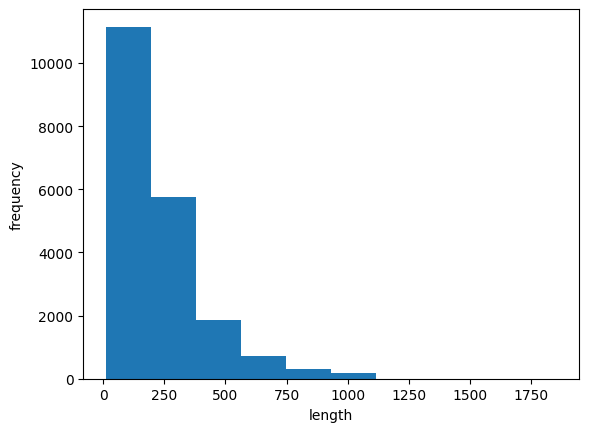

In [ ]:
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

100단어로 맞춰 준다.

In [ ]:
lengths[:10]

array([259, 520, 290, 109, 559,  96, 130, 935, 383, 716])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [ ]:
len(train_input[5])

96

In [ ]:
train_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2, 352,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94, 364, 352,   2,   2,  11, 190,  24, 484,   2,   7,  94, 205,
       405,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2], dtype=int32)

In [ ]:
train_seq[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158], dtype=int32)

In [ ]:
train_input[0][:10]

[1, 73, 89, 81, 25, 60, 2, 6, 20, 141]

In [ ]:
train_input[0][-10:]

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]

In [ ]:
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
train_seq.shape, train_target.shape, val_seq.shape, val_target.shape, test_input.shape, test_target.shape

((20000, 100), (20000,), (5000, 100), (5000,), (25000,), (25000,))

#순환 신경망 만들기

노드 :  8개

input_shape = (20000, 100, 500)


500개 -> 2

'hi' -> 1, 나머지 499개 0

In [ ]:
from tensorflow import keras

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)

In [ ]:
train_oh.shape

(20000, 100, 500)

In [ ]:
train_seq[0][1]

4

In [ ]:
train_oh[0][1][:10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
val_oh.shape

(5000, 100, 500)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4081 (15.94 KB)
Trainable params: 4081 (15.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_simplernn_model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

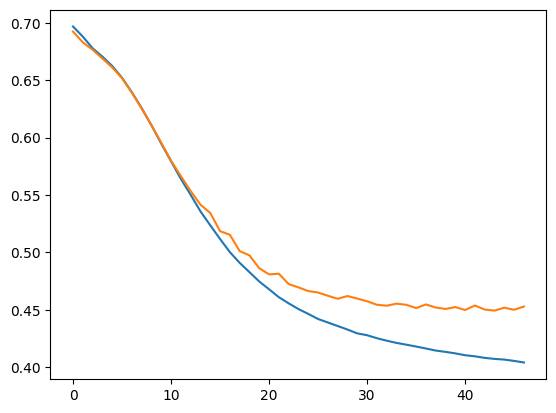

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#임베딩

(20000, 100, 500)

(20000, 100)

(100,) -> (100, 500)


(100,) -> (100, 16) : 임베딩

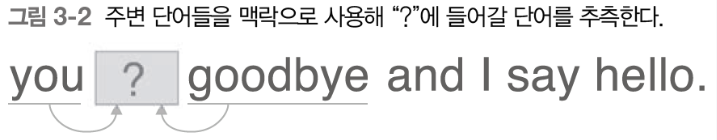

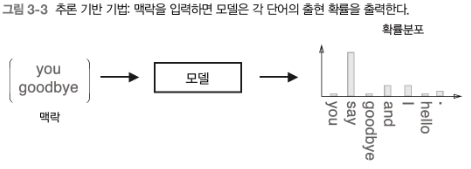

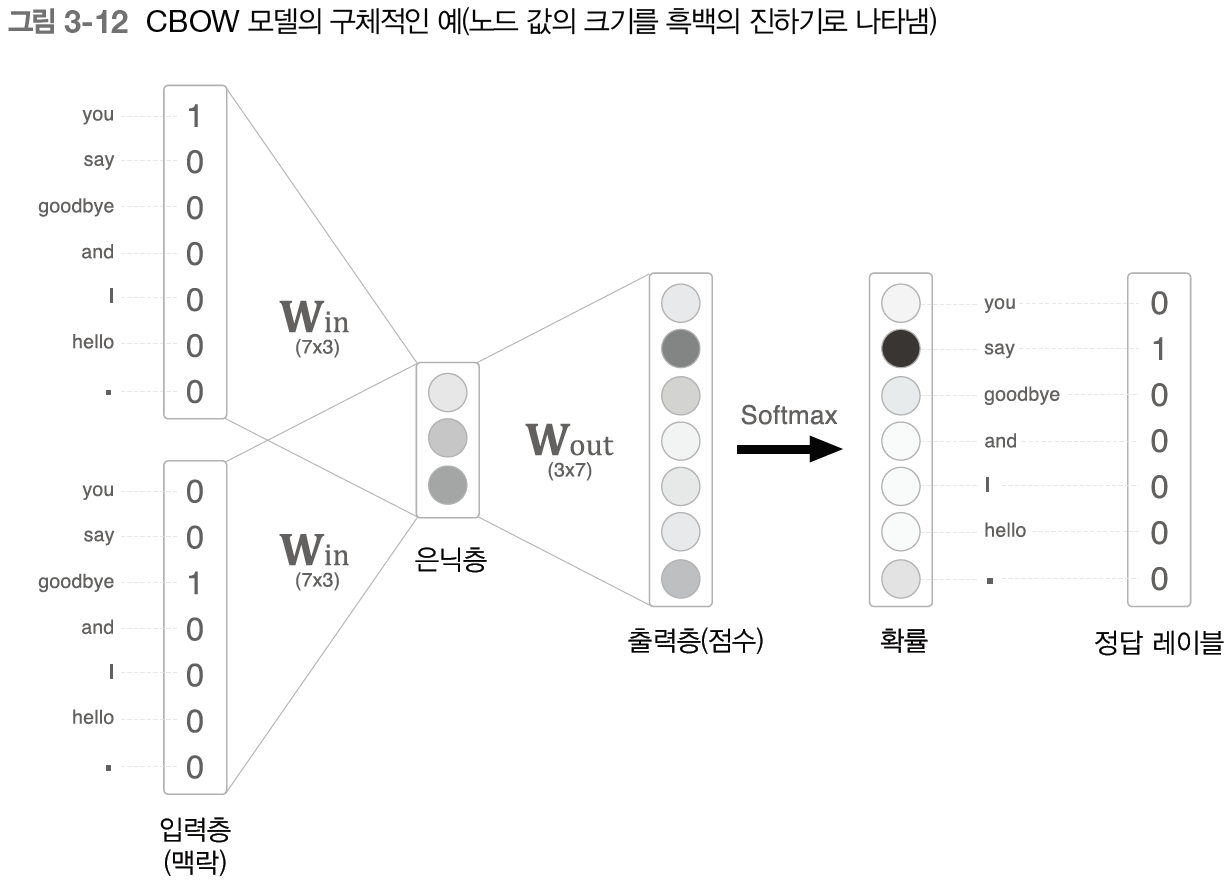

$W_{in}$, $W_{out}$

$W_{in}$ 을 임베딩을 한 단어의 벡터로 삼는다.

단어를 벡터로 변환 : 임베딩 -> keras.layers.Embedding

(100, 16)

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100)) #임베딩 벡터 크기=16, 총 단어수 = 500, 시퀀스의 길이=100
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8209 (32.07 KB)
Trainable params: 8209 (32.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)

In [ ]:
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

In [ ]:
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=[val_seq, val_target],
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 32s 96ms/step - loss: 0.6894 - accuracy: 0.5333 - val_loss: 0.6695 - val_accuracy: 0.6032
Epoch 2/100
  2/313 [..............................] - ETA: 22s - loss: 0.6546 - accuracy: 0.6484

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 25s 80ms/step - loss: 0.6391 - accuracy: 0.6646 - val_loss: 0.6174 - val_accuracy: 0.7032
Epoch 3/100
313/313 [==============================] - 25s 79ms/step - loss: 0.5964 - accuracy: 0.7169 - val_loss: 0.5829 - val_accuracy: 0.7308
Epoch 4/100
313/313 [==============================] - 24s 78ms/step - loss: 0.5639 - accuracy: 0.7442 - val_loss: 0.5601 - val_accuracy: 0.7368
Epoch 5/100
313/313 [==============================] - 25s 81ms/step - loss: 0.5374 - accuracy: 0.7611 - val_loss: 0.5366 - val_accuracy: 0.7602
Epoch 6/100
313/313 [==============================] - 24s 78ms/step - loss: 0.5166 - accuracy: 0.7719 - val_loss: 0.5206 - val_accuracy: 0.7622
Epoch 7/100
313/313 [==============================] - 24s 78ms/step - loss: 0.4988 - accuracy: 0.7839 - val_loss: 0.5054 - val_accuracy: 0.7766
Epoch 8/100
313/313 [==============================] - 25s 79ms/step - loss: 0.4836 - accuracy: 0.7915 - val_loss: 0.4995 - val_accuracy: 0.77

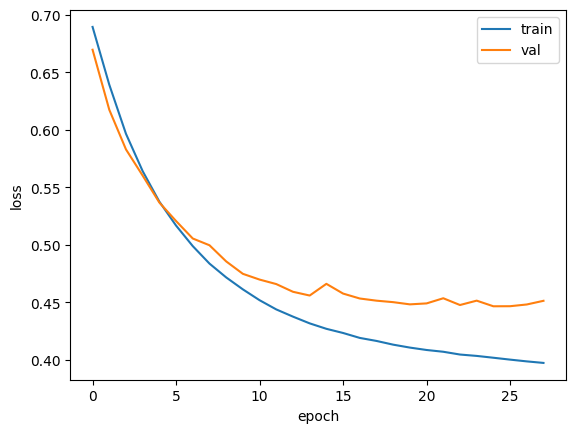

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#RNN에서 참고할 옵션

  return_sequence = True : 모든 은닉 상태를 출력하게 한다.

  return_state = True : 마지막 은닉 상태를 다시 출력 하게 해준다.

In [ ]:
train_X = np.array([[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]])

In [ ]:
train_X.shape, train_X.ndim

((4, 5), 2)

In [ ]:
train_X = train_X.reshape(-1, 4, 5)

In [ ]:
train_X.shape

(1, 4, 5)

In [ ]:
train_X

array([[[0.1, 4.2, 1.5, 1.1, 2.8],
        [1. , 3.1, 2.5, 0.7, 1.1],
        [0.3, 2.1, 1.5, 2.1, 0.1],
        [2.2, 1.4, 0.5, 0.9, 1.1]]])

In [ ]:
#rnn = keras.layers.SimpleRNN(3)
rnn = keras.layers.SimpleRNN(3, return_state=False, return_sequences=False)
hidden_state=rnn(train_X)

In [ ]:
print(hidden_state)

tf.Tensor([[-0.3552349   0.9204301   0.61840016]], shape=(1, 3), dtype=float32)


In [ ]:
rnn = keras.layers.SimpleRNN(3, return_sequences=True)
hidden_state=rnn(train_X)

In [ ]:
print(hidden_state.numpy())

[[[-0.6636093   0.7647357   0.9978092 ]
  [-0.5742634  -0.36990428  0.99341166]
  [ 0.04826696 -0.8576403   0.11713018]
  [-0.7312088  -0.3862542  -0.86813116]]]


In [ ]:
hidden_state.shape

TensorShape([1, 4, 3])

In [ ]:
rnn = keras.layers.SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state=rnn(train_X)
print('hidden state: {}, shape: {}'.format(hidden_states, hidden_states.shape))
print(last_state, last_state.shape)

hidden state: [[[ 0.98986995 -0.2106994  -0.5867417 ]
  [ 0.9422199  -0.89891404 -0.45844442]
  [ 0.8840063  -0.73069155  0.30309013]
  [ 0.12888315 -0.66220343  0.71831083]]], shape: (1, 4, 3)
tf.Tensor([[ 0.12888315 -0.66220343  0.71831083]], shape=(1, 3), dtype=float32) (1, 3)


In [ ]:
hidden_state[0]

<tf.Tensor: shape=(1, 4, 3), dtype=float32, numpy=
array([[[ 0.9902114 , -0.55148864, -0.9980756 ],
        [ 0.5696476 , -0.5317835 , -0.9941675 ],
        [-0.5636144 , -0.9829075 , -0.99878263],
        [-0.9138769 , -0.22911361, -0.2790581 ]]], dtype=float32)>

In [ ]:
hidden_state[1]

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.9138769 , -0.22911361, -0.2790581 ]], dtype=float32)>

In [ ]:
rnn = keras.layers.SimpleRNN(3, return_state=True) #return_sequences = False
hidden_states=rnn(train_X)

In [ ]:
hidden_states

[<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.5293081 ,  0.9838216 , -0.86778855]], dtype=float32)>,
 <tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.5293081 ,  0.9838216 , -0.86778855]], dtype=float32)>]

#임베딩 연습

In [ ]:
from gensim.models.word2vec import Word2Vec

In [ ]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 46.7 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt #형태소 분석라이브러리 = Okt

In [ ]:
train_data = pd.read_table('./drive/MyDrive/ratings_train.txt')

In [ ]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
train_data.isnull().values.any()

True

In [ ]:
train_data = train_data.dropna(how='any')

In [ ]:
train_data.isnull().values.any()

False

In [ ]:
len(train_data)

149995

In [ ]:
train_data['document'] = train_data['document'].str.replace(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","",regex=True)

<ipython-input-92-7021e81f3335>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['document'] = train_data['document'].str.replace(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","",regex=True)


In [ ]:
train_data.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [ ]:
for se in train_data['document'][-10:]:
  print(se)

이걸 영화라고 찎었냐
 나쁜 인상은 아니지만오랫동안 기억에 남아종종 떠올라서조금은 사람을 피곤하게 만드는 영화 
공포나 재난영화가 아니라 아예 대놓고 비급 크리쳐개그물임ㅋㅋ 음악 완전 흥겹다ㅋ 점정도가 적당한 거 같은데 평점이 좀 높아서ㅋㅋ
 칼 세이건으로 시작해서 칼 세이건으로 끝난다
디케이드 다음에 더블 다음에 오즈인데 더블은 조금밖에 안나오네요
인간이 문제지 소는 뭔죄인가
평점이 너무 낮아서
이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다
청춘 영화의 최고봉방황과 우울했던 날들의 자화상
한국 영화 최초로 수간하는 내용이 담긴 영화


In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
okt = Okt()

In [ ]:
tokenized_data = []
for sentence in train_data['document']:
  tokenized_sentence = okt.morphs(sentence, stem=True)
  stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
  tokenized_data.append(stopwords_removed_sentence)

In [ ]:
tokenized_data[:3]

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]

In [ ]:
ss=1
for i in map(len, tokenized_data):
  print(i)
  ss +=1
  if ss>10:
    break

5
11
8
8
16
16
5
35
7
13


In [ ]:
max(len(review) for review in tokenized_data)

72

In [ ]:
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=5,
                 workers=4, sg=0)

In [ ]:
model.wv.vectors.shape

(14254, 100)

In [ ]:
model.wv['국가']

array([ 8.35310668e-03,  4.95012775e-02,  4.36421663e-01, -3.22211832e-01,
       -2.63226666e-02,  2.85933644e-01,  1.71264172e-01,  4.83563304e-01,
        5.15380085e-01,  6.47927701e-01, -3.89874488e-01, -1.92087606e-01,
        5.75541295e-02,  3.77542853e-01, -2.56951958e-01, -5.96712112e-01,
       -3.12823415e-01,  5.11952788e-02, -3.30183893e-01,  4.55799371e-01,
       -2.49688655e-01,  1.99400455e-01, -5.34609139e-01, -3.33757773e-02,
        4.41417664e-01, -2.13478774e-01, -1.66669667e-01,  1.99130550e-01,
       -5.49755096e-01,  1.46225467e-01, -7.49342591e-02, -1.66434601e-01,
       -4.14089650e-01,  7.31912702e-02,  2.28142858e-01,  4.81790602e-02,
        3.52389514e-02, -8.79322946e-01,  2.99346745e-01, -1.06554127e+00,
       -1.47354484e+00,  1.03777364e-01,  4.44785237e-01,  4.50154692e-02,
        1.27869993e-01, -4.89704341e-01, -4.04625297e-01, -1.78906366e-01,
       -4.10976857e-02,  1.59720257e-01,  3.89948905e-01, -3.18736076e-01,
       -6.81253970e-01, -

In [ ]:
model.wv.most_similar('영웅')

[('국가', 0.8311960697174072),
 ('집단', 0.8278993964195251),
 ('민족', 0.8217260241508484),
 ('의하다', 0.8155063986778259),
 ('인종', 0.8108288049697876),
 ('현대', 0.8105525374412537),
 ('폭력', 0.8072755336761475),
 ('전쟁', 0.8044865727424622),
 ('정부', 0.8038182854652405),
 ('주의', 0.8037886619567871)]

#LSTM

LSTM = RNN + 4배의 가중치

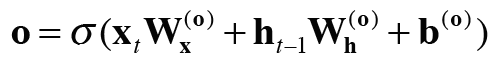

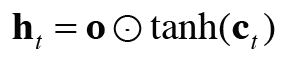

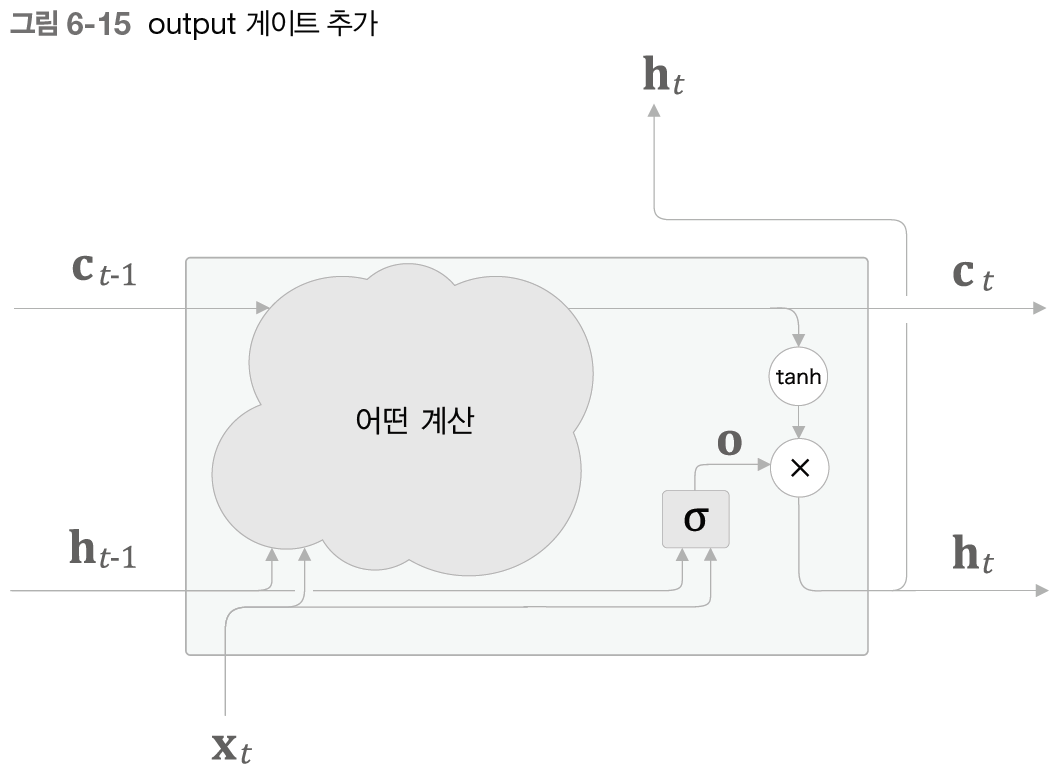

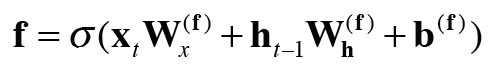

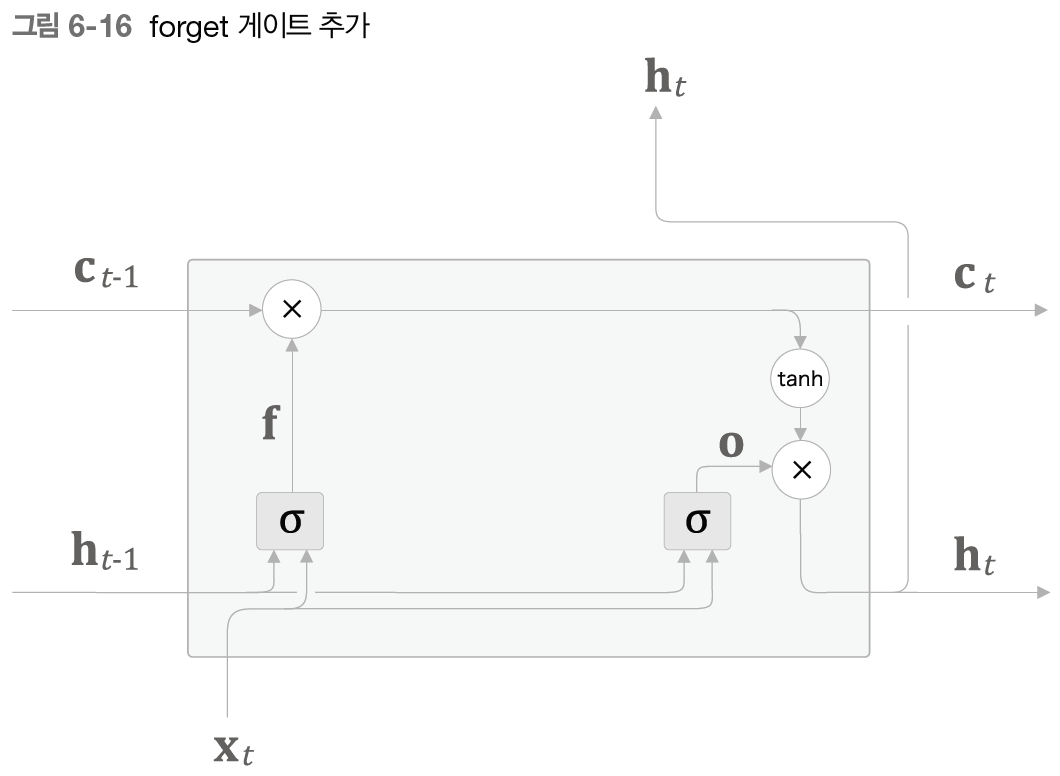

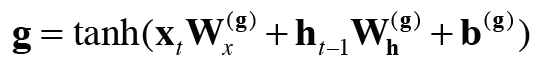

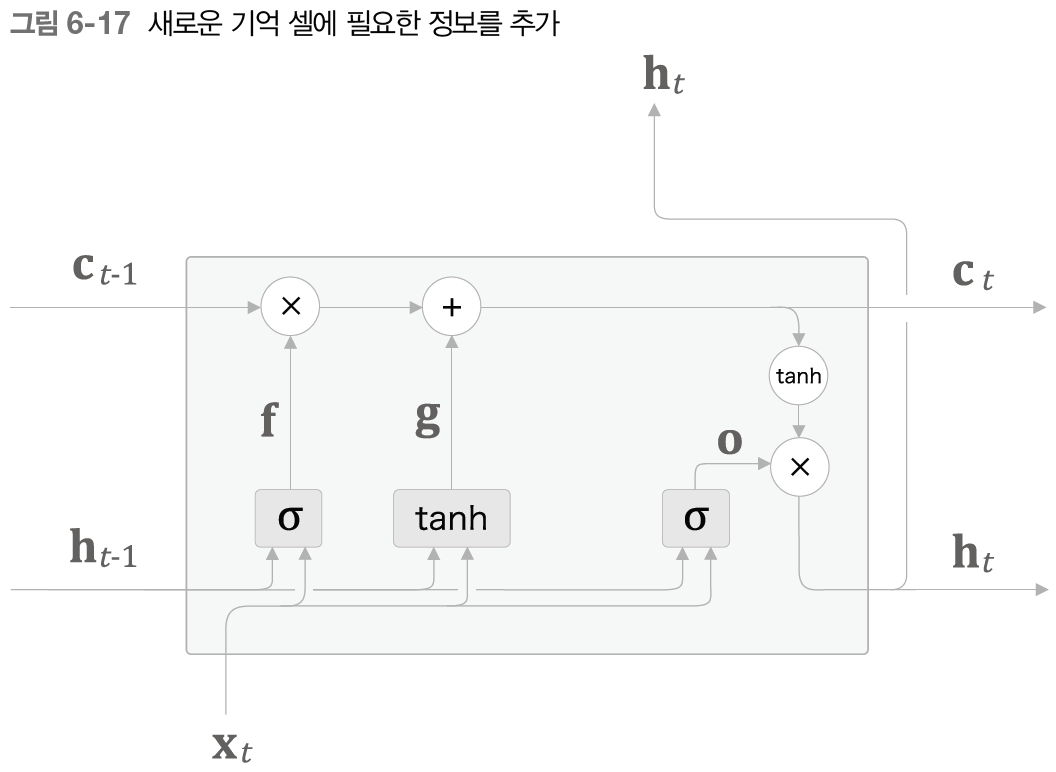

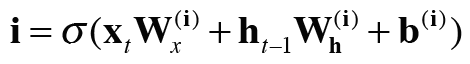

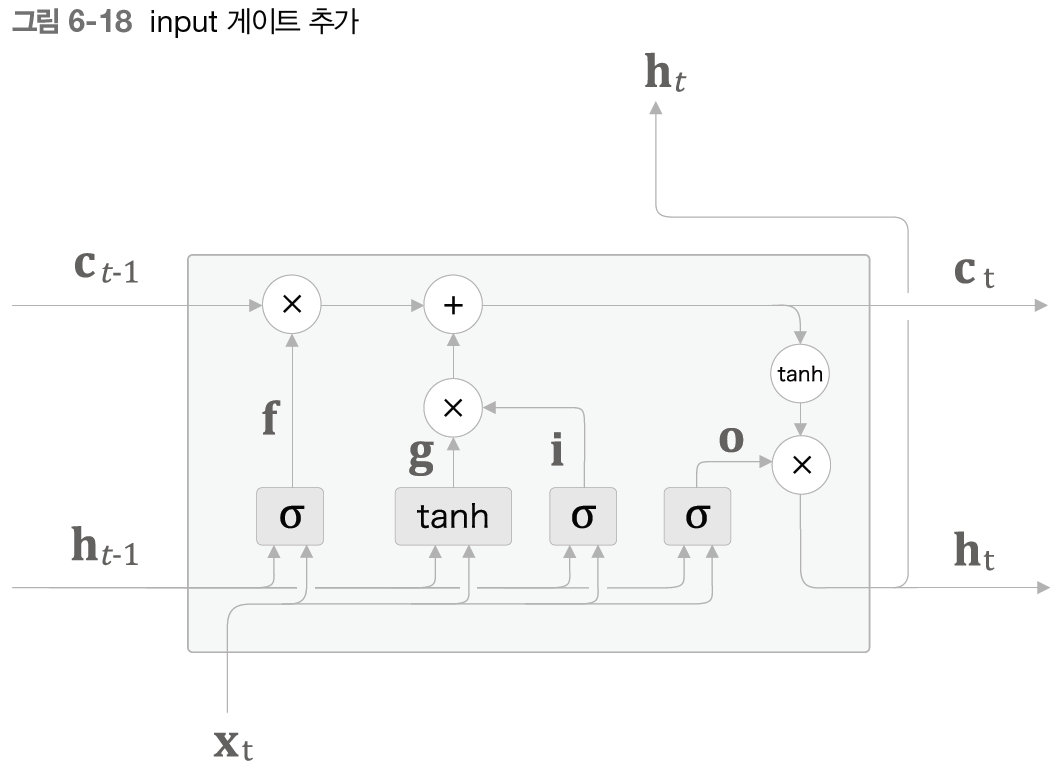

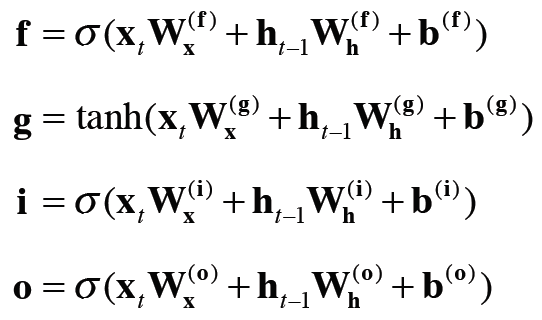

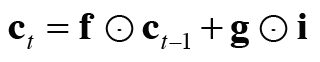

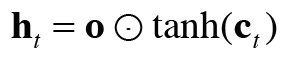

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target =train_test_split(train_input, train_target, test_size=0.2,
                                                                   random_state=42)

In [ ]:
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 29ms/step - loss: 0.6926 - accuracy: 0.5369 - val_loss: 0.6922 - val_accuracy: 0.5536
Epoch 2/100
 10/313 [..............................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5703

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 17ms/step - loss: 0.6914 - accuracy: 0.5794 - val_loss: 0.6908 - val_accuracy: 0.5856
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6892 - accuracy: 0.6113 - val_loss: 0.6879 - val_accuracy: 0.6174
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6845 - accuracy: 0.6402 - val_loss: 0.6808 - val_accuracy: 0.6408
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6706 - accuracy: 0.6601 - val_loss: 0.6523 - val_accuracy: 0.6780
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6171 - accuracy: 0.7053 - val_loss: 0.5909 - val_accuracy: 0.7226
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5797 - accuracy: 0.7364 - val_loss: 0.5705 - val_accuracy: 0.7358
Epoch 8/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5575 - accuracy: 0.7477 - val_loss: 0.5513 - val_accuracy: 0.7504
Epoc

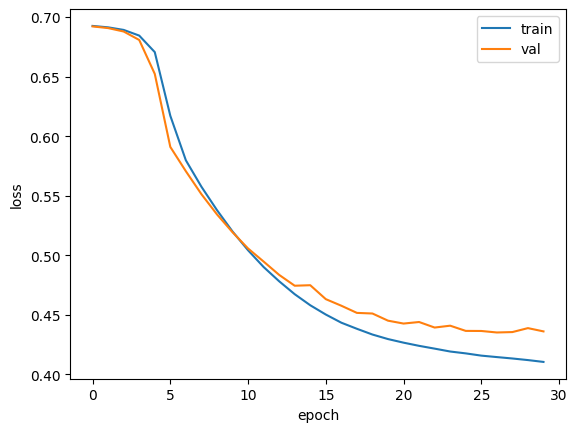

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 드롭아웃

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 32ms/step - loss: 0.6923 - accuracy: 0.5279 - val_loss: 0.6914 - val_accuracy: 0.5478
Epoch 2/100
 16/313 [>.............................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5684

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 16ms/step - loss: 0.6903 - accuracy: 0.5745 - val_loss: 0.6888 - val_accuracy: 0.6014
Epoch 3/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6866 - accuracy: 0.6109 - val_loss: 0.6842 - val_accuracy: 0.6188
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6797 - accuracy: 0.6295 - val_loss: 0.6742 - val_accuracy: 0.6458
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6613 - accuracy: 0.6669 - val_loss: 0.6440 - val_accuracy: 0.6856
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5978 - accuracy: 0.7106 - val_loss: 0.5624 - val_accuracy: 0.7226
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5471 - accuracy: 0.7344 - val_loss: 0.5343 - val_accuracy: 0.7460
Epoch 8/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5237 - accuracy: 0.7503 - val_loss: 0.5129 - val_accuracy: 0.7594
Epoc

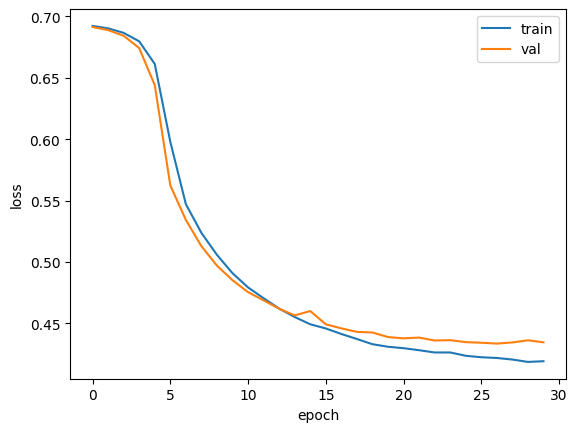

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 2층 순환신경망

LSTM 1층 - (20000, 100, 500) 입력값

LSTM 2층 - (      3차원         ) 입력값 - return_sequences=True



In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 35ms/step - loss: 0.6928 - accuracy: 0.5189 - val_loss: 0.6925 - val_accuracy: 0.5512
Epoch 2/100
  9/313 [..............................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5712

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6s 19ms/step - loss: 0.6914 - accuracy: 0.5803 - val_loss: 0.6900 - val_accuracy: 0.6028
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6853 - accuracy: 0.6301 - val_loss: 0.6776 - val_accuracy: 0.6498
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6529 - accuracy: 0.6729 - val_loss: 0.6214 - val_accuracy: 0.6908
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5882 - accuracy: 0.7100 - val_loss: 0.5638 - val_accuracy: 0.7182
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5540 - accuracy: 0.7315 - val_loss: 0.5357 - val_accuracy: 0.7404
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5298 - accuracy: 0.7461 - val_loss: 0.5133 - val_accuracy: 0.7570
Epoch 8/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5122 - accuracy: 0.7563 - val_loss: 0.4977 - val_accuracy: 0.7704
Epoc

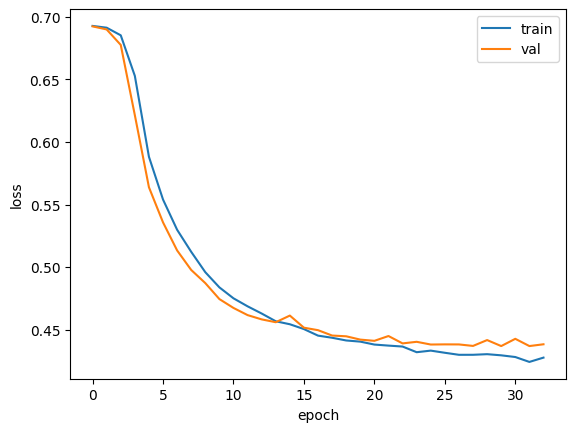

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()